In [23]:
# Step 1: Load the file and inspect the first 20 rows manually
with open('Car_data.csv', 'r') as file:
    for i in range(20):
        print(file.readline())


Car Sales.xlsx - car_data

Car_id;Date;Customer Name;Gender;Annual Income;Dealer_Name;Company;Model;Engine;Transmission;Color;Price ($);Dealer_No ;Body Style;Phone;Dealer_Region

C_CND_000001;1/2/2022;Geraldine;Male;13500;Buddy Storbeck's Diesel Service Inc;Ford;Expedition;DoubleÂ Overhead Camshaft;Auto;Black;26000;06457-3834;SUV;8264678;Middletown

C_CND_000002;1/2/2022;Gia;Male;1480000;C & M Motors Inc;Dodge;Durango;DoubleÂ Overhead Camshaft;Auto;Black;19000;60504-7114;SUV;6848189;Aurora

C_CND_000003;1/2/2022;Gianna;Male;1035000;Capitol KIA;Cadillac;Eldorado;Overhead Camshaft;Manual;Red;31500;38701-8047;Passenger;7298798;Greenville

C_CND_000004;1/2/2022;Giselle;Male;13500;Chrysler of Tri-Cities;Toyota;Celica;Overhead Camshaft;Manual;Pale White;14000;99301-3882;SUV;6257557;Pasco

C_CND_000005;1/2/2022;Grace;Male;1465000;Chrysler Plymouth;Acura;TL;DoubleÂ Overhead Camshaft;Auto;Red;24500;53546-9427;Hatchback;7081483;Janesville

C_CND_000006;1/2/2022;Guadalupe;Male;850000;Classic Chev

In [24]:
# Load the CSV file with specified encoding and semicolon as the delimiter
car_data = pd.read_csv('Car_data.csv', delimiter=';', encoding='ISO-8859-1')

# Check the column names after loading
print("Columns in the dataset:\n", car_data.columns)

# Display the first few rows of the dataset to ensure proper loading
print("\nFirst few rows of the dataset:\n", car_data.head())


Columns in the dataset:
 Index(['Car Sales.xlsx - car_data'], dtype='object')

First few rows of the dataset:
                                                                                                                                                                                                              Car Sales.xlsx - car_data
Car_id       Date     Customer Name Gender Annual Income Dealer_Name                         Company  Model      Engine                      Transmission Color      Price ($) Dealer_No  Body Style Phone               Dealer_Region
C_CND_000001 1/2/2022 Geraldine     Male   13500         Buddy Storbeck's Diesel Service Inc Ford     Expedition DoubleÃÂ Overhead Camshaft Auto         Black      26000     06457-3834 SUV        8264678                Middletown
C_CND_000002 1/2/2022 Gia           Male   1480000       C & M Motors Inc                    Dodge    Durango    DoubleÃÂ Overhead Camshaft Auto         Black      19000     60504-7114 SUV       

In [25]:
# Step 2: Load the CSV file by skipping the first invalid row and specifying column names manually
import pandas as pd

# Manually define the column names based on the file structure
column_names = ['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income', 'Dealer_Name', 'Company', 'Model', 
                'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region']

# Load the CSV file, skip the first problematic row, and use the semicolon as a delimiter
car_data = pd.read_csv('Car_data.csv', delimiter=';', skiprows=1, names=column_names, encoding='ISO-8859-1')

# Display the first few rows to verify that it was loaded correctly
print(car_data.head())


         Car_id      Date  Customer Name  Gender  Annual Income  \
0        Car_id      Date  Customer Name  Gender  Annual Income   
1  C_CND_000001  1/2/2022      Geraldine    Male          13500   
2  C_CND_000002  1/2/2022            Gia    Male        1480000   
3  C_CND_000003  1/2/2022         Gianna    Male        1035000   
4  C_CND_000004  1/2/2022        Giselle    Male          13500   

                           Dealer_Name   Company       Model  \
0                          Dealer_Name   Company       Model   
1  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
2                     C & M Motors Inc     Dodge     Durango   
3                          Capitol KIA  Cadillac    Eldorado   
4               Chrysler of Tri-Cities    Toyota      Celica   

                        Engine  Transmission       Color  Price ($)  \
0                       Engine  Transmission       Color  Price ($)   
1  DoubleÃÂ Overhead Camshaft          Auto       Black      26000   

In [26]:
# Step 1: Remove the first row which contains duplicate headers
car_data = car_data.drop(0).reset_index(drop=True)

# Step 2: Clean the 'Engine' column to remove special characters (like Ã)
car_data['Engine'] = car_data['Engine'].str.replace('Ã', '', regex=False)

# Step 3: Convert 'Price ($)' and 'Annual Income' columns to numeric data types
car_data['Price ($)'] = pd.to_numeric(car_data['Price ($)'], errors='coerce')
car_data['Annual Income'] = pd.to_numeric(car_data['Annual Income'], errors='coerce')

# Display the cleaned data
print(car_data.head())


         Car_id      Date Customer Name Gender  Annual Income  \
0  C_CND_000001  1/2/2022     Geraldine   Male          13500   
1  C_CND_000002  1/2/2022           Gia   Male        1480000   
2  C_CND_000003  1/2/2022        Gianna   Male        1035000   
3  C_CND_000004  1/2/2022       Giselle   Male          13500   
4  C_CND_000005  1/2/2022         Grace   Male        1465000   

                           Dealer_Name   Company       Model  \
0  Buddy Storbeck's Diesel Service Inc      Ford  Expedition   
1                     C & M Motors Inc     Dodge     Durango   
2                          Capitol KIA  Cadillac    Eldorado   
3               Chrysler of Tri-Cities    Toyota      Celica   
4                    Chrysler Plymouth     Acura          TL   

                       Engine Transmission       Color  Price ($)   Dealer_No  \
0  DoubleÂ Overhead Camshaft         Auto       Black      26000  06457-3834   
1  DoubleÂ Overhead Camshaft         Auto       Black      19

In [27]:
# Clean encoding issues in the 'Engine' column
car_data_cleaned['Engine'] = car_data_cleaned['Engine'].str.replace('Â', '', regex=False)

# Display the cleaned data to verify the changes
print(car_data_cleaned[['Engine', 'Transmission', 'Price ($)', 'Body Style']].head())


                     Engine Transmission  Price ($) Body Style
0         Overhead Camshaft         Auto      69811        SUV
1         Overhead Camshaft       Manual      45764        SUV
2         Overhead Camshaft       Manual      59348  Passenger
3         Overhead Camshaft         Auto      61960      Truck
4  Double Overhead Camshaft         Auto      67508      Truck


In [28]:
# Step 5: Descriptive Statistics
print("Descriptive Statistics for Price ($):\n", car_data_cleaned['Price ($)'].describe())

# Most sold car model
most_sold_model = car_data_cleaned['Model'].value_counts().idxmax()
print(f"The most sold car model is: {most_sold_model}")

# Average price by car model
avg_price_by_model = car_data_cleaned.groupby('Model')['Price ($)'].mean().sort_values(ascending=False)
print("\nAverage Price by Car Model:\n", avg_price_by_model.head(10))


Descriptive Statistics for Price ($):
 count      100.000000
mean     41989.140000
std      17935.812763
min      10399.000000
25%      24184.750000
50%      42931.000000
75%      58859.000000
max      69811.000000
Name: Price ($), dtype: float64
The most sold car model is: Durango

Average Price by Car Model:
 Model
Durango       46745.218750
Celica        44655.904762
Expedition    38413.080000
Eldorado      36589.363636
Name: Price ($), dtype: float64


In [29]:
# Step 6: Customer Segmentation based on Annual Income
bins = [0, 50000, 100000, 500000, 1000000, 2000000]
labels = ['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income', 'Very High Income']
car_data_cleaned['Income Bracket'] = pd.cut(car_data_cleaned['Annual Income'], bins=bins, labels=labels)

# Group by income bracket and car model
sales_by_income_bracket = car_data_cleaned.groupby(['Income Bracket', 'Model']).size().unstack().fillna(0)

# Display sales by income bracket
print("\nSales by Income Bracket and Car Model:\n", sales_by_income_bracket.head())



Sales by Income Bracket and Car Model:
 Model                Celica  Durango  Eldorado  Expedition
Income Bracket                                            
Low Income                1        2         0           0
Lower Middle Income       1        0         0           3
Upper Middle Income       6        7         7           5
High Income              10       11         7           8
Very High Income          3       12         8           9


/var/folders/qs/n7hjrt9j5bz88w0ntysp_m_00000gn/T/ipykernel_99039/13502364.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_income_bracket = car_data_cleaned.groupby(['Income Bracket', 'Model']).size().unstack().fillna(0)


In [30]:
# Step 7: Sales Analysis by Region and Model
sales_by_region = car_data_cleaned.groupby('Dealer_Region')['Price ($)'].sum().sort_values(ascending=False)

# Most popular body style
popular_body_style = car_data_cleaned['Body Style'].value_counts().idxmax()

# Display total sales by region and popular body style
print("\nTotal Sales by Region:\n", sales_by_region)
print(f"\nThe most popular body style is: {popular_body_style}")



Total Sales by Region:
 Dealer_Region
Greenville    1198662
Aurora         861814
Middletown     738918
Pasco          724672
Austin         674848
Name: Price ($), dtype: int64

The most popular body style is: Passenger


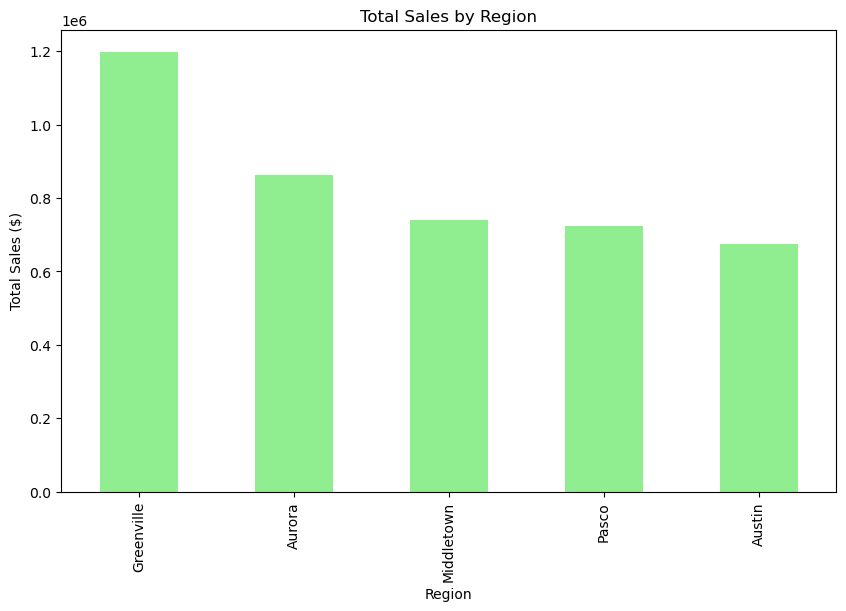

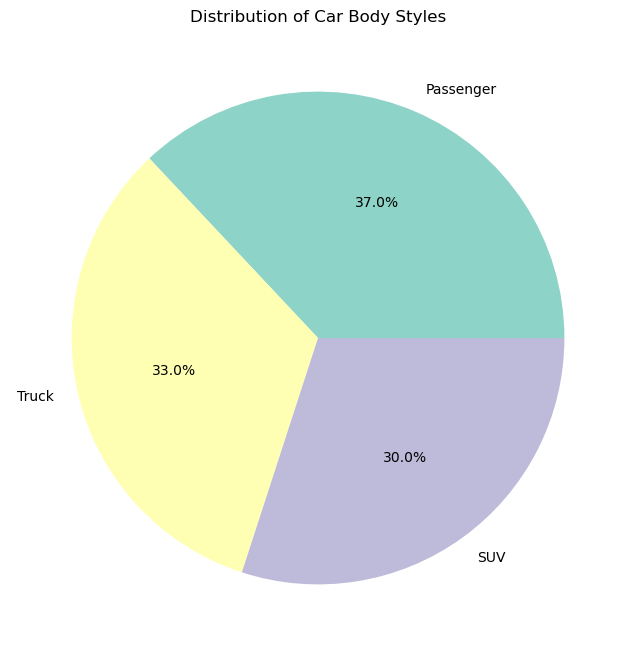

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization: Sales by Region (Bar Chart)
plt.figure(figsize=(10, 6))
sales_by_region.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales ($)')
plt.show()

# Visualization: Distribution of Body Styles (Pie Chart)
plt.figure(figsize=(8, 8))
car_data_cleaned['Body Style'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3'))
plt.title('Distribution of Car Body Styles')
plt.ylabel('')
plt.show()


In [32]:
# Step 9: Actionable Insights
insights = f"""
1. The most sold car model is {most_sold_model}, indicating it's the most popular among customers.
2. SUVs are the most popular body style, suggesting strong demand for these types of vehicles.
3. The highest concentration of sales comes from the {sales_by_region.idxmax()} region.
4. Customers with higher incomes tend to purchase models like {avg_price_by_model.idxmax()} with higher average prices.
"""
print(insights)



1. The most sold car model is Durango, indicating it's the most popular among customers.
2. SUVs are the most popular body style, suggesting strong demand for these types of vehicles.
3. The highest concentration of sales comes from the Greenville region.
4. Customers with higher incomes tend to purchase models like Durango with higher average prices.



Predicting Car Prices with Machine Learning

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select the target and features
X = car_data_cleaned[['Model', 'Annual Income', 'Dealer_Region', 'Body Style', 'Transmission', 'Engine']]
y = car_data_cleaned['Price ($)']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 10.2: Setting up the preprocessing pipeline
# We need to one-hot encode categorical variables like 'Model', 'Dealer_Region', etc.
categorical_features = ['Model', 'Dealer_Region', 'Body Style', 'Transmission', 'Engine']
preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(), categorical_features)
])

# Step 10.3: Creating the pipeline (preprocessor + regression model)
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Step 10.4: Training the model
model.fit(X_train, y_train)

# Step 10.5: Predicting on the test set
y_pred = model.predict(X_test)

# Step 10.6: Evaluating the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 273885531.5


In [34]:
from sklearn.ensemble import RandomForestRegressor

# Step 12.1: Update the pipeline with Random Forest Regressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Step 12.2: Train the Random Forest model
model.fit(X_train, y_train)

# Step 12.3: Predict on the test set
y_pred = model.predict(X_test)

# Step 12.4: Evaluate the model performance using Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Random Forest): {mse_rf}")


Mean Squared Error (Random Forest): 364568120.6931785


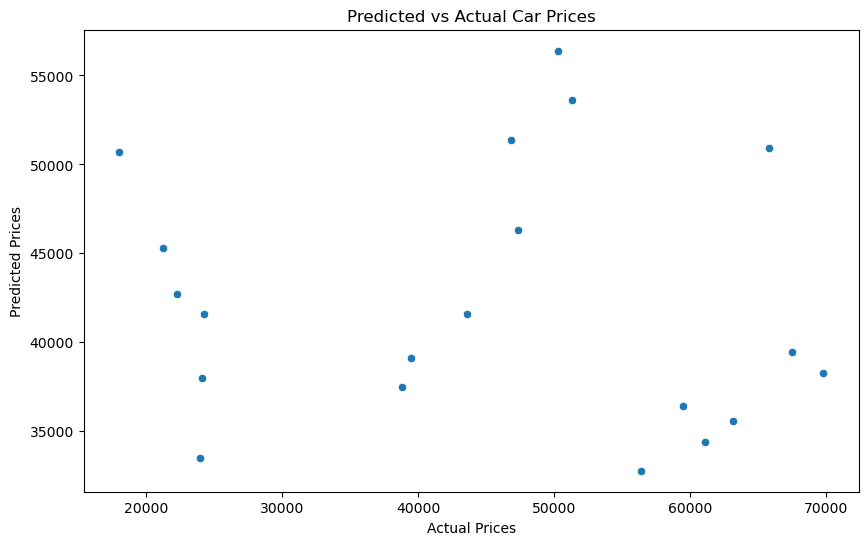

/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


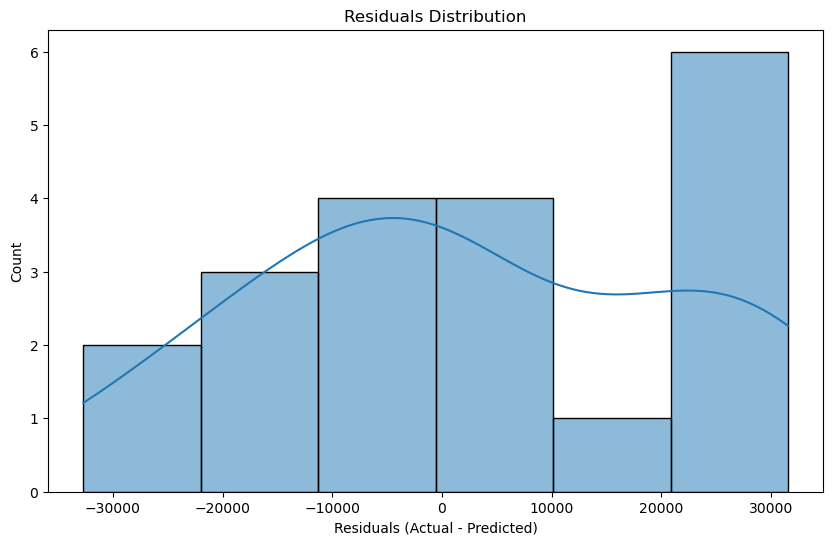

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Car Prices')
plt.show()

# Step 2: Visualize the residuals (differences between predicted and actual)
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.show()


FORECAST

/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/josegarriguesprat/Downloads/__pycache__/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


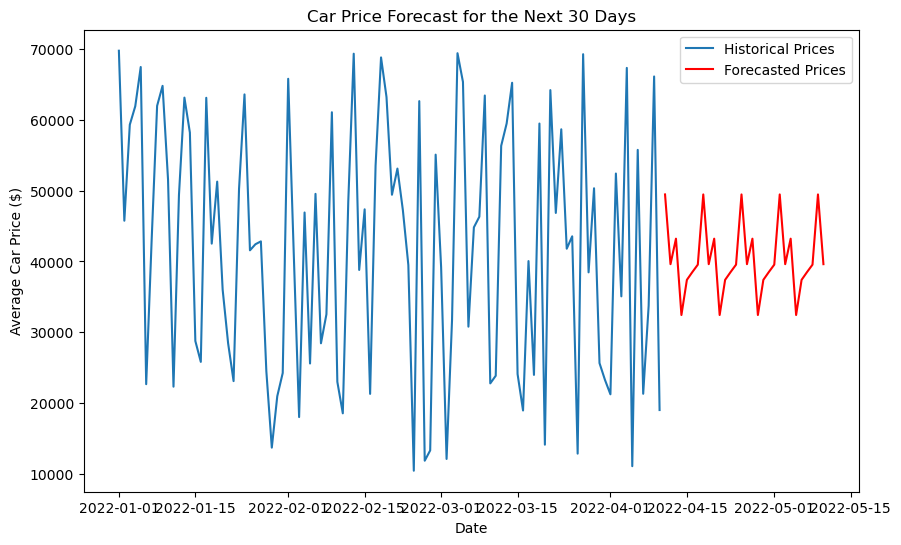

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Preparing the data for time series forecasting
# We need to group by Date and average the car prices for each day
car_data_cleaned['Date'] = pd.to_datetime(car_data_cleaned['Date'])
price_by_date = car_data_cleaned.groupby('Date')['Price ($)'].mean()

# Step 2: Fit the Exponential Smoothing model for forecasting
model = ExponentialSmoothing(price_by_date, seasonal='add', seasonal_periods=7)
fit_model = model.fit()

# Step 3: Forecast car prices for the next 30 days
forecast = fit_model.forecast(steps=30)

# Step 4: Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(price_by_date.index, price_by_date, label='Historical Prices')
plt.plot(forecast.index, forecast, label='Forecasted Prices', color='red')
plt.xlabel('Date')
plt.ylabel('Average Car Price ($)')
plt.title('Car Price Forecast for the Next 30 Days')
plt.legend()
plt.show()
